<a href="https://colab.research.google.com/github/aartigoswami91/EDA/blob/main/SequentialModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Keras Implementation

#### Approach to creating Model
1. Sequential Model
      [Sequential of layers: layers one taking input and passing to others/next]
2. Functinal Model
      [multi model, Trasnfer Learning, ]
      1. Dense Layers, Fully Connected Layers, MLP
      2. Dropout (Avoids Overfitting)
3. Compilation
      1. Optimiser (SGD, ADAM)
      2. LOSS Function( Regression, Classification Loss Func)
      3. Metrics(Accuracy)
4. Model Fit
      1. X & Y (Train, Test )
      2. Epochs (Numbers of iterations)
      3. Batch_size = 128,256 -Batch of Images  


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
#########Keras Libraries and Modules ###########
import tensorflow as tf
from  keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical


In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:

X = train.iloc[:,1:]
y = train['label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)


In [5]:
model = Sequential()
model.add(Dense(128, activation ='relu', input_shape = (784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer="Adam", loss='CategoricalCrossentropy', metrics=["accuracy"])

In [8]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [9]:
print(y_train_ohe)
print(y_test_ohe)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [10]:
hist = model.fit(X_train, y_train_ohe, validation_data=(X_test,y_test_ohe), batch_size=64,epochs=250, verbose=2)

Epoch 1/250
409/409 - 6s - loss: nan - accuracy: 0.4995 - val_loss: nan - val_accuracy: 0.0956 - 6s/epoch - 14ms/step
Epoch 2/250
409/409 - 4s - loss: nan - accuracy: 0.0981 - val_loss: nan - val_accuracy: 0.0956 - 4s/epoch - 9ms/step
Epoch 3/250
409/409 - 2s - loss: nan - accuracy: 0.0981 - val_loss: nan - val_accuracy: 0.0956 - 2s/epoch - 6ms/step
Epoch 4/250
409/409 - 3s - loss: nan - accuracy: 0.0981 - val_loss: nan - val_accuracy: 0.0956 - 3s/epoch - 6ms/step
Epoch 5/250
409/409 - 2s - loss: nan - accuracy: 0.0981 - val_loss: nan - val_accuracy: 0.0956 - 2s/epoch - 5ms/step
Epoch 6/250
409/409 - 2s - loss: nan - accuracy: 0.0981 - val_loss: nan - val_accuracy: 0.0956 - 2s/epoch - 5ms/step
Epoch 7/250
409/409 - 3s - loss: nan - accuracy: 0.0981 - val_loss: nan - val_accuracy: 0.0956 - 3s/epoch - 8ms/step
Epoch 8/250
409/409 - 2s - loss: nan - accuracy: 0.0981 - val_loss: nan - val_accuracy: 0.0956 - 2s/epoch - 6ms/step
Epoch 9/250
409/409 - 2s - loss: nan - accuracy: 0.0981 - val_l

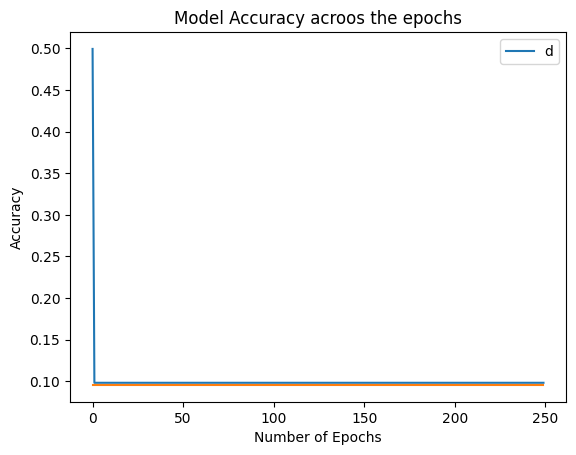

In [14]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy acroos the epochs')
plt.legend('d')
plt.show()

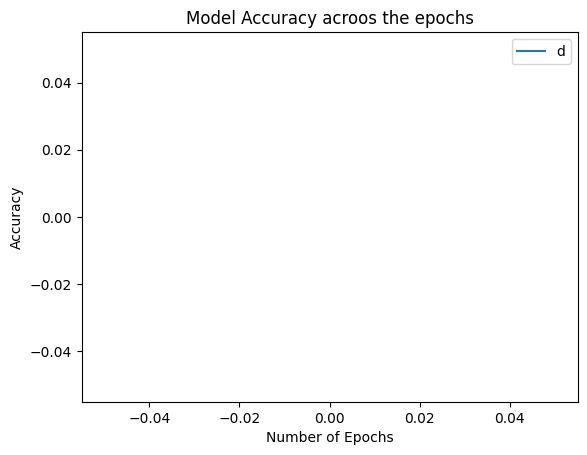

In [15]:
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy acroos the epochs')
plt.legend('d')
plt.show()